In [1]:
from seq_process import pickle_to_sequence, folders_to_sequence, normalize_seq, draw_squeleton, draw_sequence

In [2]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf

import pandas as pd
import pickle

from keras.layers import Input, LSTM, Dense, Lambda, Reshape, RepeatVector
from keras.models import Model, Sequential
from keras import backend as K
from keras import metrics

Using TensorFlow backend.


In [3]:
# 10s sequences, non overlapping
seq_data, samples, targets = folders_to_sequence(folder_list=['./sarahscottpole/vid_out/'],                                                                
                                                              #'./phoenixkazree/vid_out/',
                                                              #'./bridgetmonro/vid_out/',
                                                              #'./nicocasa/vid_out/'] ,
                                                lookback=150, steps=1, forward=1, lag=30,
                                                retain_previous=True, standardize=False, normalize=True, head=False,
                                                seq2seq=False, add_flip=True)
 

len(samples)

./sarahscottpole/vid_out/
2017-09-20_20-07-55_UTC.mp4_out.avi
2017-09-22_17-38-00_UTC.mp4_out.avi
2017-09-24_18-09-20_UTC.mp4_out.avi
2017-09-29_13-30-13_UTC.mp4_out.avi
2017-09-30_20-35-03_UTC.mp4_out.avi
2017-10-05_17-08-26_UTC.mp4_out.avi
2017-10-17_15-58-11_UTC.mp4_out.avi
2017-10-19_17-05-02_UTC.mp4_out.avi
2017-10-21_20-24-48_UTC.mp4_out.avi
2017-10-23_16-02-46_UTC.mp4_out.avi
2017-10-24_15-50-51_UTC.mp4_out.avi
2017-10-26_15-58-41_UTC.mp4_out.avi
2017-10-27_16-19-58_UTC.mp4_out.avi
2017-10-30_20-59-44_UTC.mp4_out.avi
2017-11-01_17-56-35_UTC.mp4_out.avi
2017-11-03_17-44-33_UTC.mp4_out.avi
2017-11-08_16-53-51_UTC.mp4_out.avi
2017-11-10_19-11-35_UTC.mp4_out.avi
2017-11-14_16-11-43_UTC.mp4_out.avi
2017-11-16_16-32-35_UTC.mp4_out.avi
2017-11-20_16-34-40_UTC.mp4_out.avi
2017-11-22_17-28-52_UTC.mp4_out.avi
2017-11-24_15-01-04_UTC.mp4_out.avi
2017-11-27_16-35-13_UTC.mp4_out.avi
2017-11-29_17-12-58_UTC.mp4_out.avi
2017-11-30_17-02-08_UTC.mp4_out.avi
2017-12-02_15-00-06_UTC.mp4_out.avi
20

4746

In [4]:
#pickle.dump(seq_data, open('./ds/seq_data_norm.pkl', 'wb'))


In [5]:
seq_data.shape

(169952, 26)

In [7]:
# input sequences
samples.shape

(4746, 150, 26)

In [8]:
draw_sequence(seq_data[5000:5500,:])

## Seq to single target

In [119]:
targets.shape

(23265, 26)

In [120]:
samples.shape

(23265, 150, 26)

In [122]:
seq_to_tgt = Sequential()
#seq_to_tgt.add(LSTM(64, return_sequences=True, input_shape=(30, 26)))
#seq_to_tgt.add(LSTM(32))
seq_to_tgt.add(LSTM(64, input_shape=(150, 26)))
seq_to_tgt.add(Dense(26))
seq_to_tgt.summary()

seq_to_tgt.compile(optimizer='rmsprop', loss='mae')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                23296     
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1690      
Total params: 24,986
Trainable params: 24,986
Non-trainable params: 0
_________________________________________________________________


In [125]:
epochs = 20
batch_size = 500

In [126]:
history = seq_to_tgt.fit(samples, targets,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2, validation_split=0.2)

Train on 18612 samples, validate on 4653 samples
Epoch 1/20
 - 15s - loss: 0.0523 - val_loss: 0.0495
Epoch 2/20
 - 19s - loss: 0.0516 - val_loss: 0.0458
Epoch 3/20
 - 18s - loss: 0.0503 - val_loss: 0.0472
Epoch 4/20
 - 16s - loss: 0.0499 - val_loss: 0.0466
Epoch 5/20
 - 15s - loss: 0.0491 - val_loss: 0.0471
Epoch 6/20
 - 16s - loss: 0.0484 - val_loss: 0.0468
Epoch 7/20
 - 17s - loss: 0.0475 - val_loss: 0.0473
Epoch 8/20
 - 16s - loss: 0.0469 - val_loss: 0.0449
Epoch 9/20
 - 15s - loss: 0.0463 - val_loss: 0.0481
Epoch 10/20
 - 16s - loss: 0.0460 - val_loss: 0.0406
Epoch 11/20
 - 15s - loss: 0.0454 - val_loss: 0.0417
Epoch 12/20
 - 15s - loss: 0.0447 - val_loss: 0.0426
Epoch 13/20
 - 16s - loss: 0.0447 - val_loss: 0.0433
Epoch 14/20
 - 16s - loss: 0.0441 - val_loss: 0.0424
Epoch 15/20
 - 16s - loss: 0.0437 - val_loss: 0.0389
Epoch 16/20
 - 15s - loss: 0.0432 - val_loss: 0.0401
Epoch 17/20
 - 15s - loss: 0.0430 - val_loss: 0.0386
Epoch 18/20
 - 16s - loss: 0.0424 - val_loss: 0.0397
Epoch 

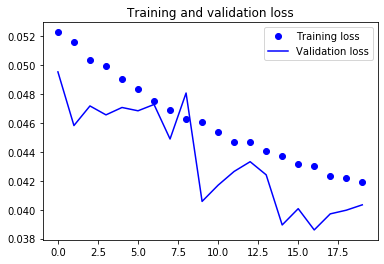

In [127]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [142]:
draw_sequence(samples[0,:,:])

In [149]:
# inference
sample = samples[0:1,:,:]

for t in range(1000):
    # pred for the last 150 frames
    pred = seq_to_tgt.predict(sample[:,-150:,:])
    # append sample
    sample = np.concatenate((sample, pred[:,None,:]), axis=1)


In [150]:
sample.shape

(1, 1150, 26)

In [151]:
draw_sequence(sample[0,:,:])
# tend to converge anf freeze on one pose

## VAE single dense layers

In [10]:
#seq_data = pd.read_pickle('./ds/seq_data_norm.pkl')
# input poses
seq_data.shape

(169952, 26)

In [11]:
# defining the key parameters
batch_size = 10000
original_dim = 26
latent_dim = 2
intermediate_dim = 13
epochs = 50
epsilon_std = 1.0

In [12]:
def sampling(args: tuple):
    # we grab the variables from the tuple
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [13]:
# input to our encoder
x = Input(shape=(original_dim,), name="input")
# intermediate layer
h = Dense(intermediate_dim, activation='relu', name="encoding")(x)
# defining the mean of the latent space
z_mean = Dense(latent_dim, name="mean")(h)
# defining the log variance of the latent space
z_log_var = Dense(latent_dim, name="log-variance")(h)
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
# defining the encoder as a keras model
encoder = Model(x, [z_mean, z_log_var, z], name="encoder")
# print out summary of what we just did
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 26)           0                                            
__________________________________________________________________________________________________
encoding (Dense)                (None, 13)           351         input[0][0]                      
__________________________________________________________________________________________________
mean (Dense)                    (None, 2)            28          encoding[0][0]                   
__________________________________________________________________________________________________
log-variance (Dense)            (None, 2)            28          encoding[0][0]                   
__________________________________________________________________________________________________
lambda_1 (

In [14]:
# Input to the decoder
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
decoder_h = Dense(intermediate_dim, activation='relu', name="decoder_h")(input_decoder)
# getting the mean from the original dimension
x_decoded = Dense(original_dim, activation='sigmoid', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder = Model(input_decoder, x_decoded, name="decoder")
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
decoder_h (Dense)            (None, 13)                39        
_________________________________________________________________
flat_decoded (Dense)         (None, 26)                364       
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [15]:
# grab the output. Recall, that we need to grab the 3rd element our sampling z
output_combined = decoder(encoder(x)[2])
# link the input and the overall output
vae = Model(x, output_combined)
# print out what the overall model looks like
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 26)                0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 407       
_________________________________________________________________
decoder (Model)              (None, 26)                403       
Total params: 810
Trainable params: 810
Non-trainable params: 0
_________________________________________________________________


In [16]:
# loss function 
def vae_loss(x: tf.Tensor, x_decoded_mean: tf.Tensor):
  xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
  kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  vae_loss = K.mean(xent_loss + kl_loss)
  return vae_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 26)                0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 407       
_________________________________________________________________
decoder (Model)              (None, 26)                403       
Total params: 810
Trainable params: 810
Non-trainable params: 0
_________________________________________________________________


In [17]:
# training
vae.fit(seq_data, seq_data,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2,
        validation_split=0.2)

Train on 135961 samples, validate on 33991 samples
Epoch 1/50
 - 3s - loss: 18.2695 - val_loss: 18.1333
Epoch 2/50
 - 0s - loss: 18.0814 - val_loss: 18.0477
Epoch 3/50
 - 0s - loss: 17.9994 - val_loss: 17.9753
Epoch 4/50
 - 0s - loss: 17.9303 - val_loss: 17.9191
Epoch 5/50
 - 0s - loss: 17.8741 - val_loss: 17.8723
Epoch 6/50
 - 0s - loss: 17.8268 - val_loss: 17.8354
Epoch 7/50
 - 0s - loss: 17.7856 - val_loss: 17.8049
Epoch 8/50
 - 0s - loss: 17.7491 - val_loss: 17.7733
Epoch 9/50
 - 0s - loss: 17.7179 - val_loss: 17.7498
Epoch 10/50
 - 0s - loss: 17.6900 - val_loss: 17.7317
Epoch 11/50
 - 0s - loss: 17.6675 - val_loss: 17.7181
Epoch 12/50
 - 0s - loss: 17.6462 - val_loss: 17.7068
Epoch 13/50
 - 0s - loss: 17.6295 - val_loss: 17.6967
Epoch 14/50
 - 0s - loss: 17.6152 - val_loss: 17.6907
Epoch 15/50
 - 0s - loss: 17.6044 - val_loss: 17.6836
Epoch 16/50
 - 0s - loss: 17.5961 - val_loss: 17.6824
Epoch 17/50
 - 0s - loss: 17.5907 - val_loss: 17.6826
Epoch 18/50
 - 0s - loss: 17.5851 - val_

In [16]:
vae.save('./models/vae.h5', overwrite=True)
decoder.save('./models/vae_decoder.h5', overwrite=True)

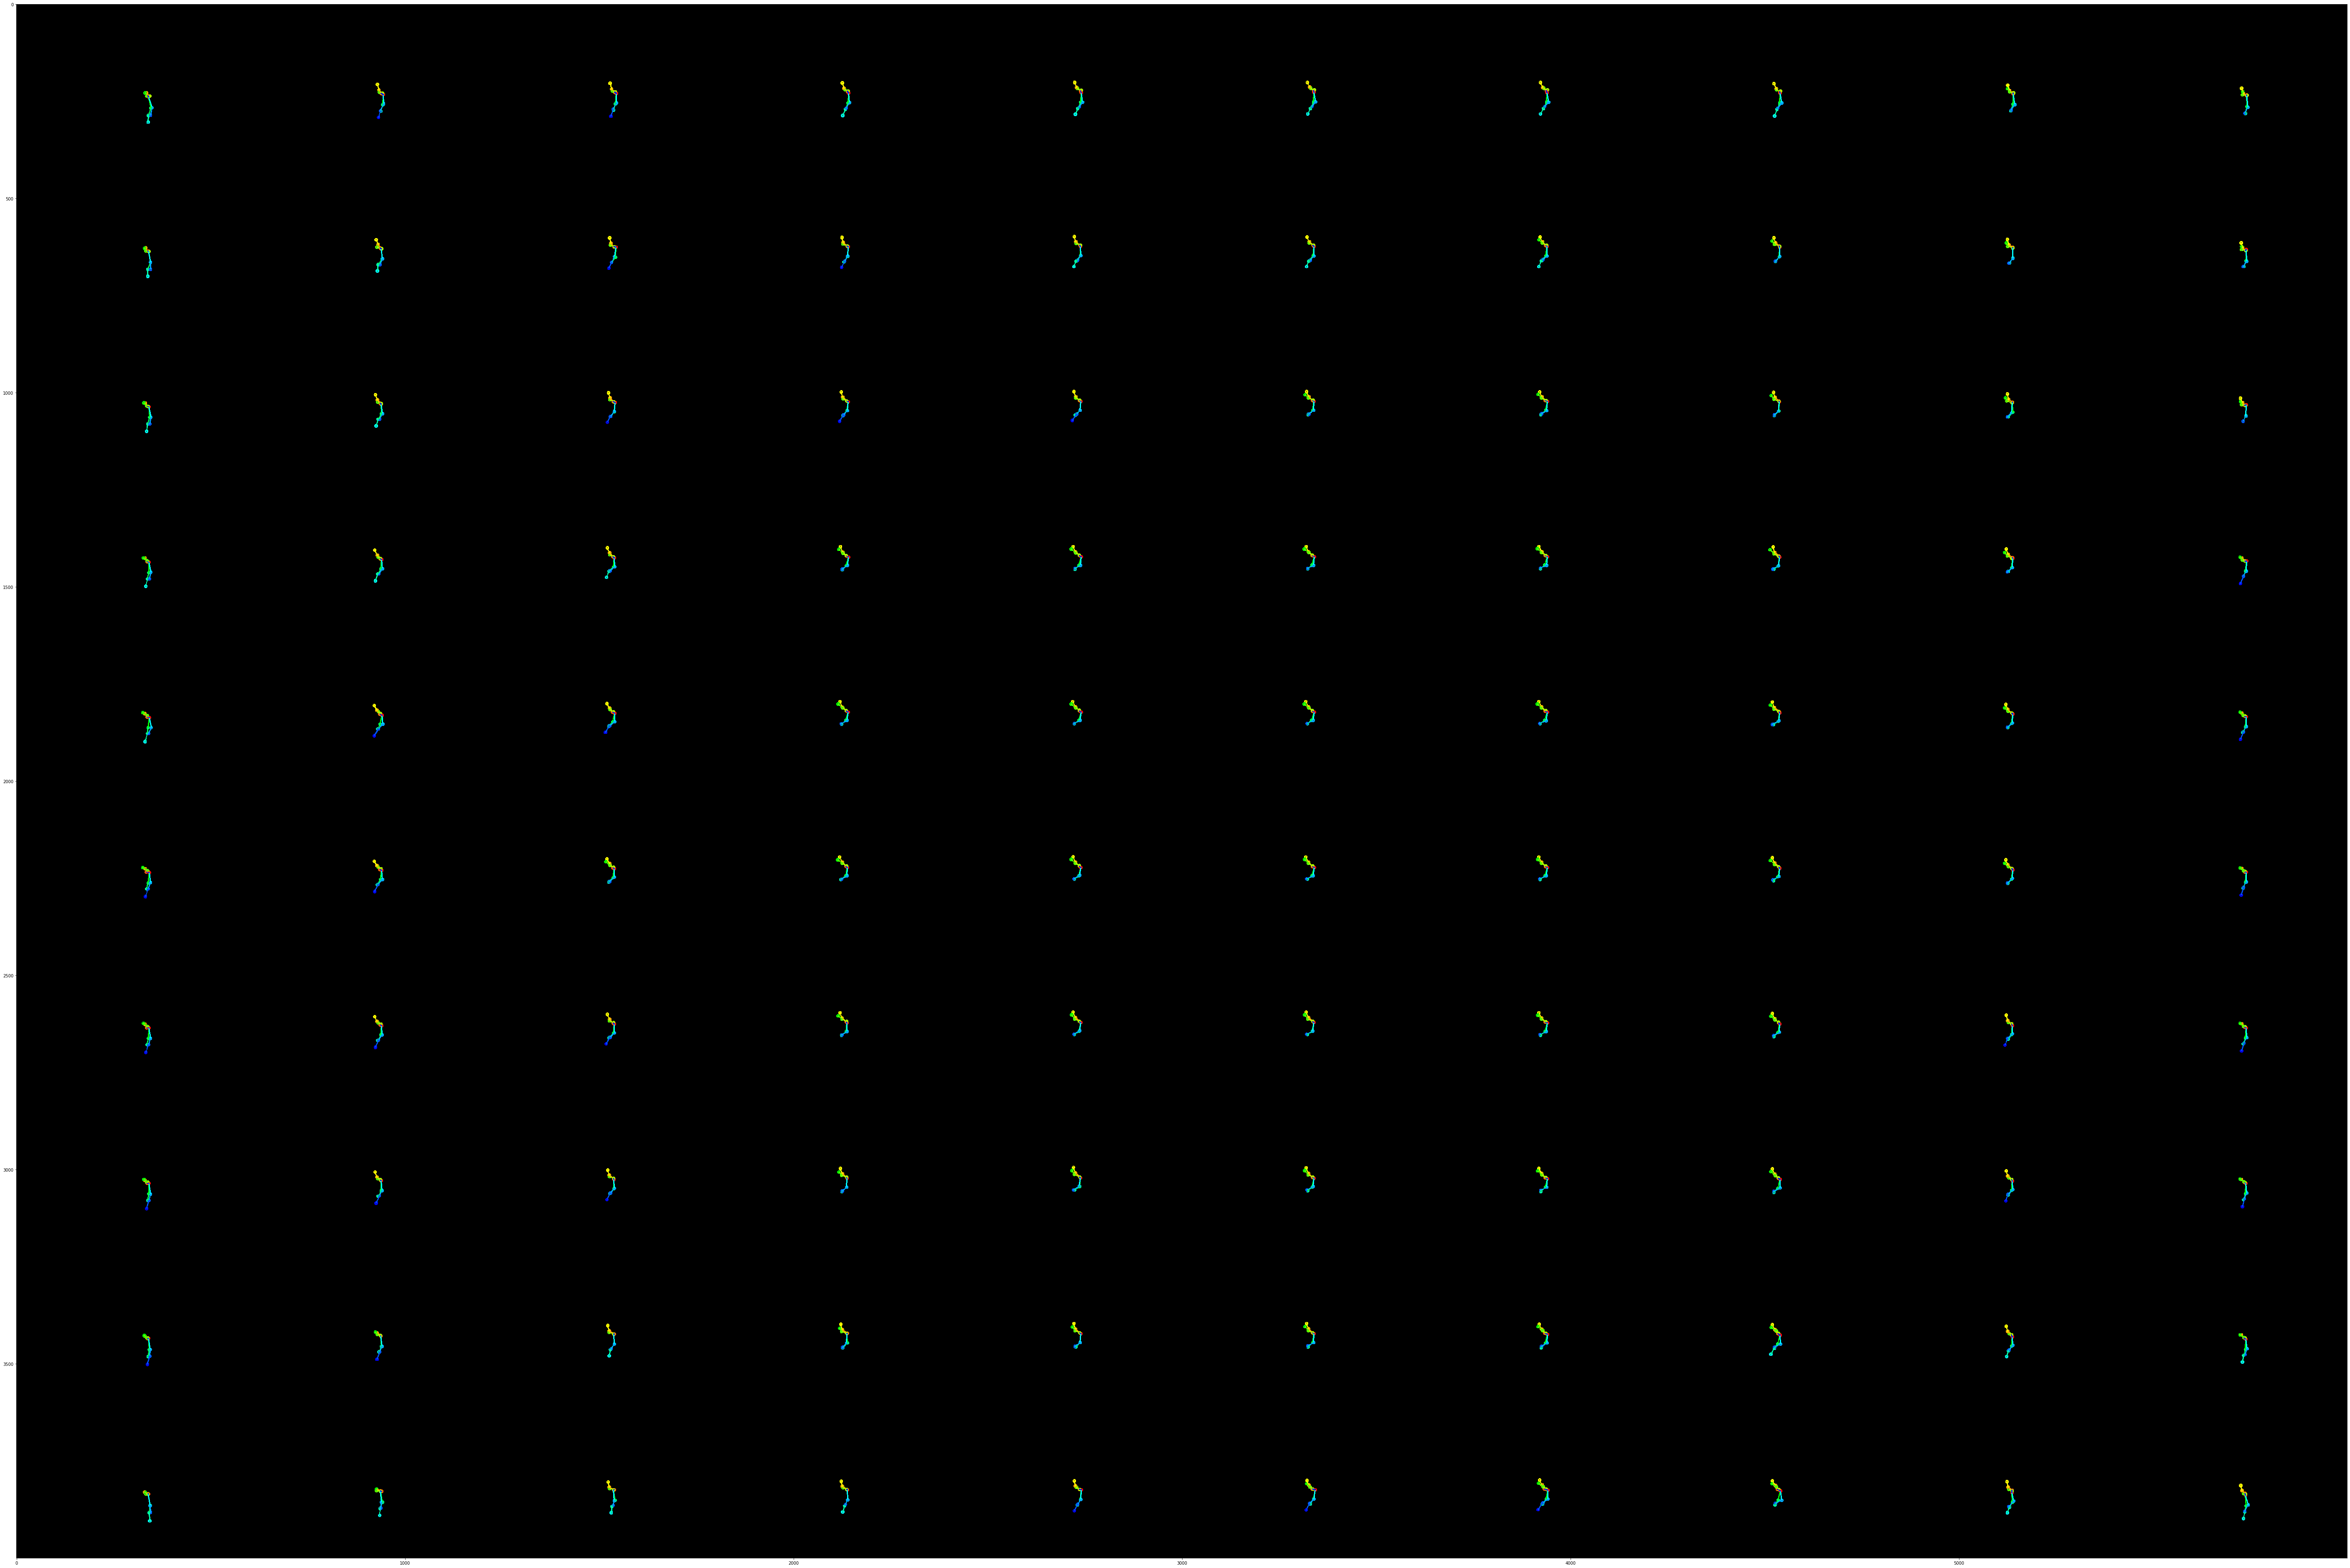

In [18]:
# display a 2D manifold of the poses
n = 10  # figure with 15x15 poses
x_size = 400
y_size = 600
img = np.zeros((x_size * n, y_size * n, 3), dtype=np.uint8)
blackimg = np.zeros((x_size, y_size, 3), dtype=np.uint8)
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        nimg = draw_squeleton(blackimg, x_decoded[0], imgcopy=True)
        
        #digit = x_decoded[0].reshape(digit_size, digit_size)
        img[i * x_size: (i + 1) * x_size,
               j * y_size: (j + 1) * y_size,:] = nimg

plt.figure(figsize=(100, 100))
plt.imshow(img)
plt.show()

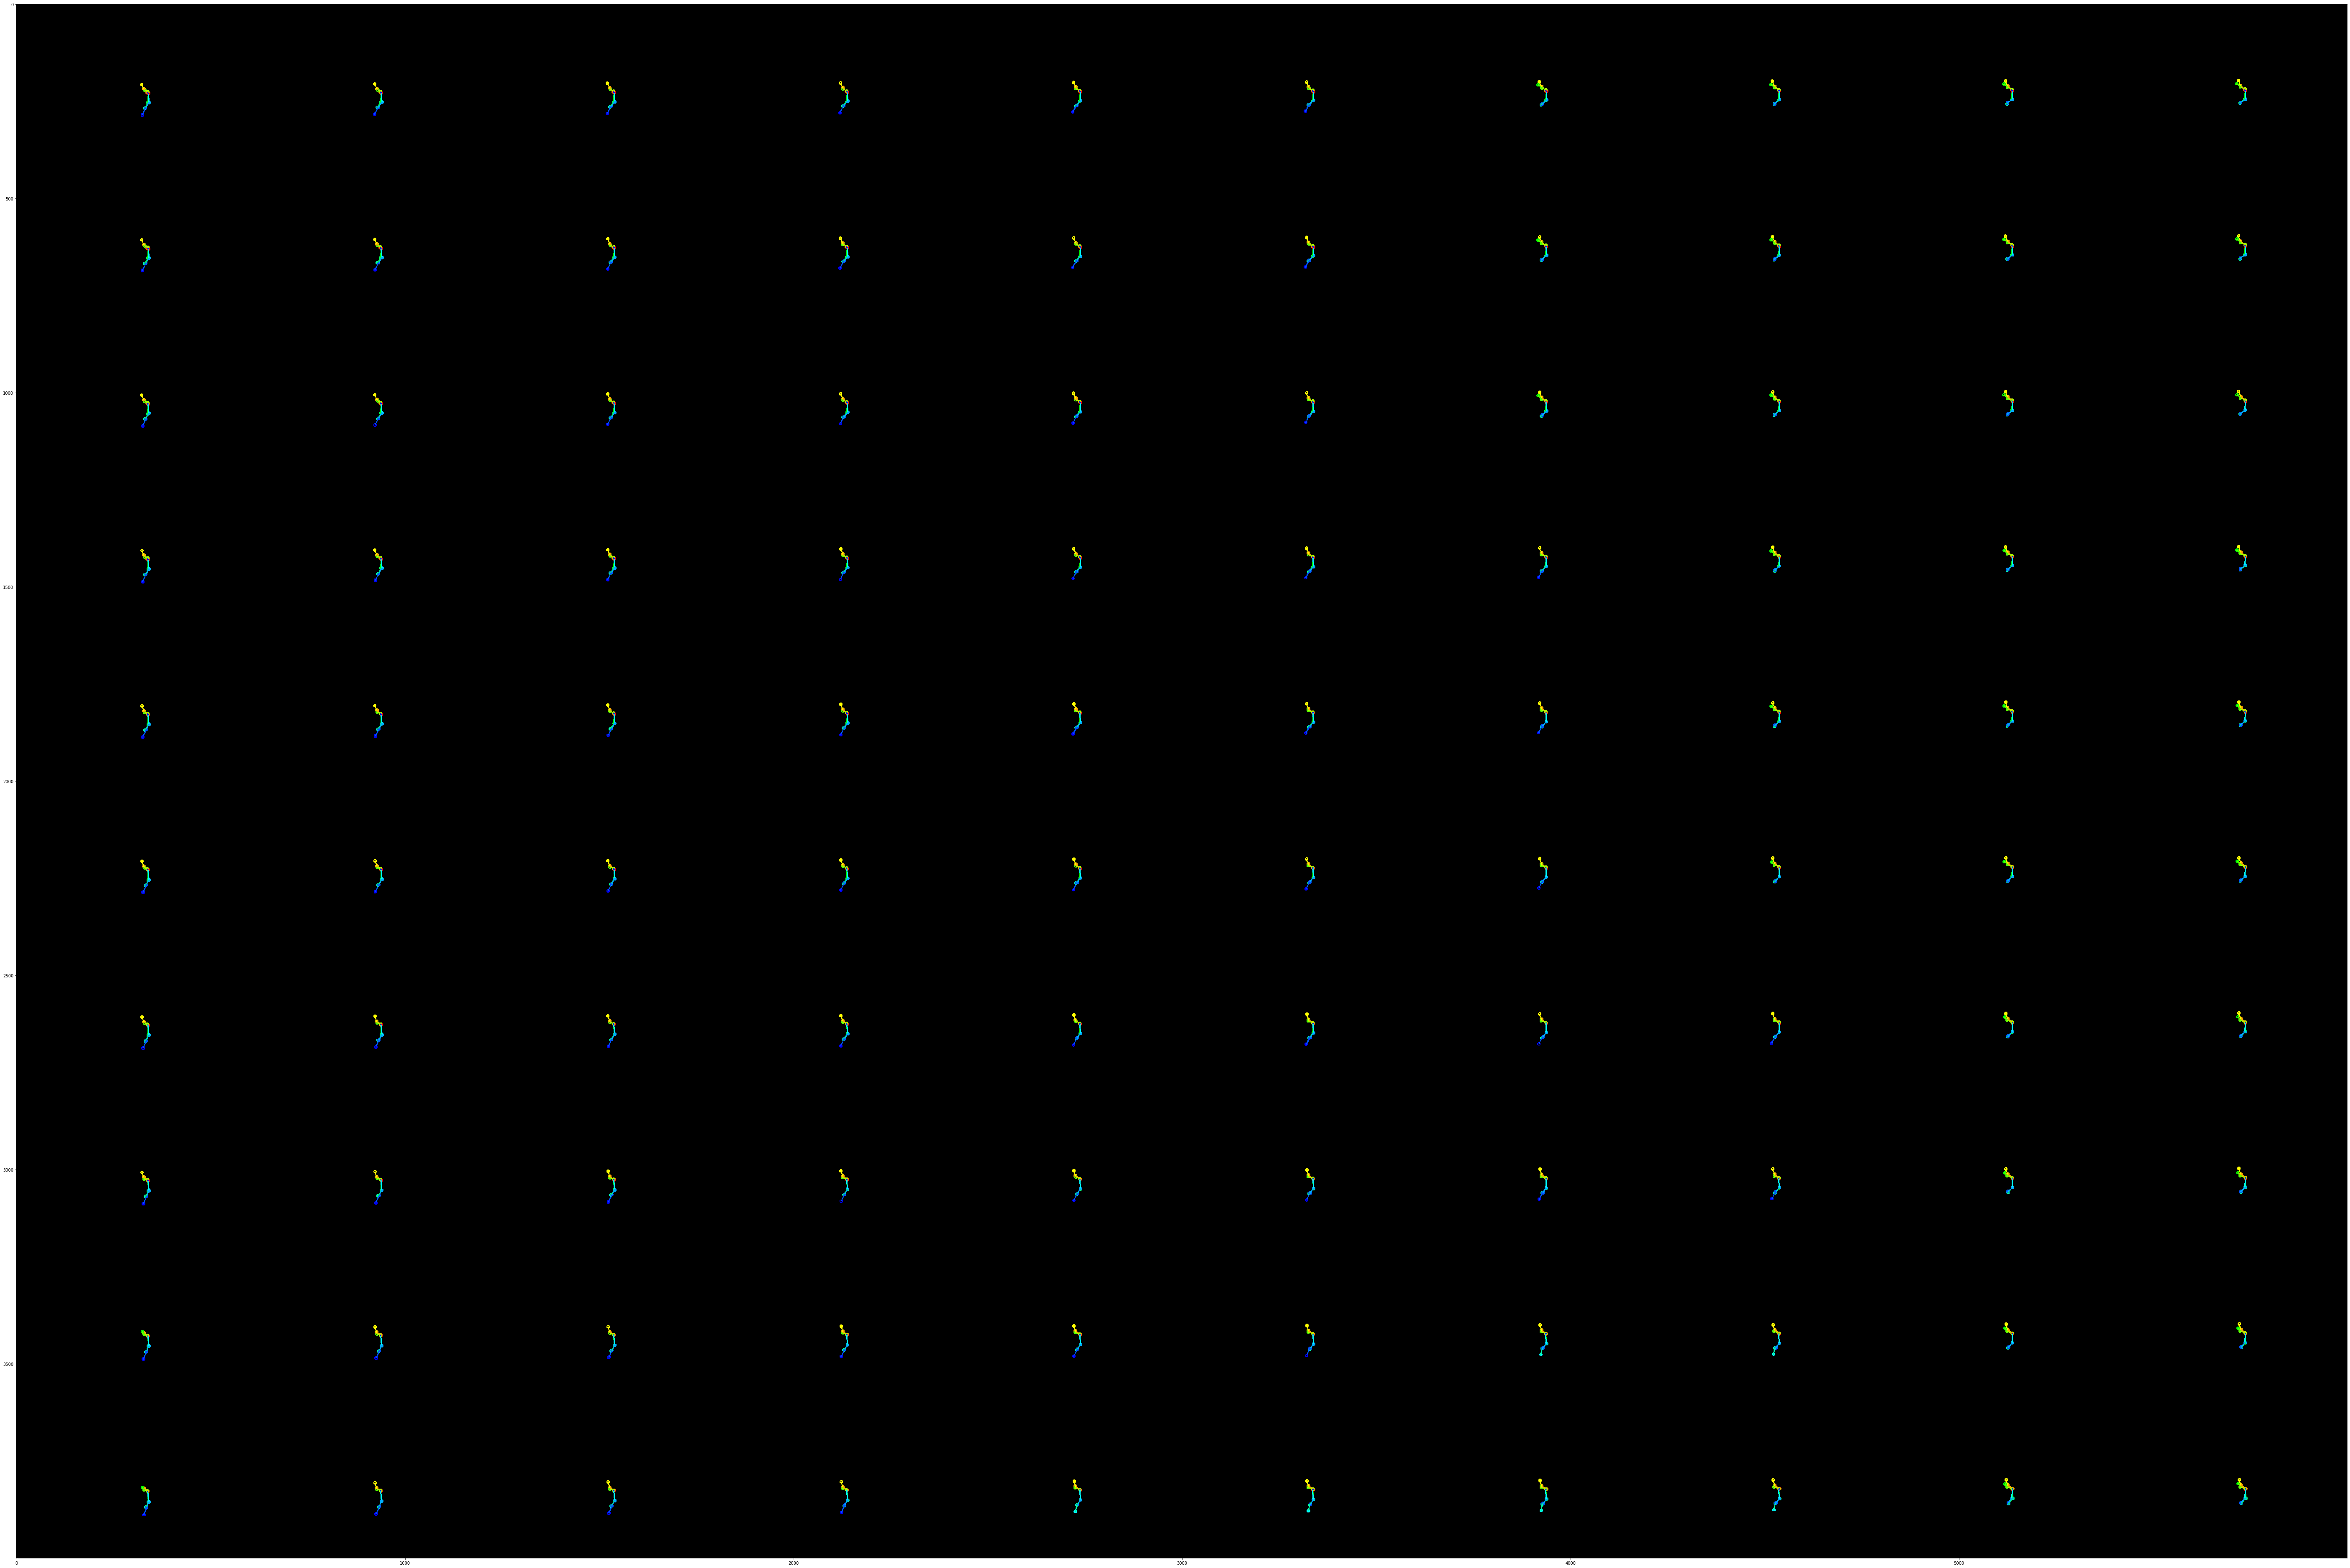

In [19]:
grid_x = norm.ppf(np.linspace(0.65, 0.85, n))
grid_y = norm.ppf(np.linspace(0.15, 0.35, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        nimg = draw_squeleton(blackimg, x_decoded[0], imgcopy=True)
        
        #digit = x_decoded[0].reshape(digit_size, digit_size)
        img[i * x_size: (i + 1) * x_size,
               j * y_size: (j + 1) * y_size,:] = nimg

plt.figure(figsize=(100, 100))
plt.imshow(img)
plt.show()

In [17]:
norm.ppf(np.linspace(0.25, 0.35, n))

array([-0.67448975, -0.63992367, -0.60610588, -0.57296755, -0.54044687,
       -0.50848806, -0.47704043, -0.44605772, -0.41549746, -0.38532047])

## Double dense layers

In [18]:
# input to our encoder
x = Input(shape=(original_dim,), name="input")
# intermediate layer
h1 = Dense(26, activation='relu', name="encoding1")(x)
h = Dense(13, activation='relu', name="encoding2")(h1)
# defining the mean of the latent space
z_mean = Dense(latent_dim, name="mean")(h)
# defining the log variance of the latent space
z_log_var = Dense(latent_dim, name="log-variance")(h)
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
# defining the encoder as a keras model
encoder2 = Model(x, [z_mean, z_log_var, z], name="encoder")
# print out summary of what we just did
encoder2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 26)           0                                            
__________________________________________________________________________________________________
encoding1 (Dense)               (None, 26)           702         input[0][0]                      
__________________________________________________________________________________________________
encoding2 (Dense)               (None, 13)           351         encoding1[0][0]                  
__________________________________________________________________________________________________
mean (Dense)                    (None, 2)            28          encoding2[0][0]                  
__________________________________________________________________________________________________
log-varian

In [19]:
# Input to the decoder
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
decoder_h1 = Dense(13, activation='relu', name="decoder_h1")(input_decoder)
decoder_h = Dense(26, activation='relu', name="decoder_h")(decoder_h1)
# getting the mean from the original dimension
x_decoded = Dense(original_dim, activation='sigmoid', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder2 = Model(input_decoder, x_decoded, name="decoder")
decoder2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
decoder_h1 (Dense)           (None, 13)                39        
_________________________________________________________________
decoder_h (Dense)            (None, 26)                364       
_________________________________________________________________
flat_decoded (Dense)         (None, 26)                702       
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [20]:
# grab the output. Recall, that we need to grab the 3rd element our sampling z
output_combined = decoder2(encoder2(x)[2])
# link the input and the overall output
vae2 = Model(x, output_combined)

vae2.compile(optimizer='rmsprop', loss=vae_loss)
vae2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 26)                0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 1109      
_________________________________________________________________
decoder (Model)              (None, 26)                1105      
Total params: 2,214
Trainable params: 2,214
Non-trainable params: 0
_________________________________________________________________


In [21]:
# training
vae2.fit(seq_data, seq_data,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2)

Epoch 1/50
 - 3s - loss: 17.8278
Epoch 2/50
 - 2s - loss: 17.7581
Epoch 3/50
 - 2s - loss: 17.7565
Epoch 4/50
 - 2s - loss: 17.7543
Epoch 5/50
 - 2s - loss: 17.7517
Epoch 6/50
 - 2s - loss: 17.7500
Epoch 7/50
 - 1s - loss: 17.7482
Epoch 8/50
 - 2s - loss: 17.7446
Epoch 9/50
 - 2s - loss: 17.7435
Epoch 10/50
 - 2s - loss: 17.7424
Epoch 11/50
 - 1s - loss: 17.7402
Epoch 12/50
 - 1s - loss: 17.7397
Epoch 13/50
 - 2s - loss: 17.7391
Epoch 14/50
 - 2s - loss: 17.7382
Epoch 15/50
 - 2s - loss: 17.7391
Epoch 16/50
 - 2s - loss: 17.7383
Epoch 17/50
 - 2s - loss: 17.7390
Epoch 18/50
 - 2s - loss: 17.7397
Epoch 19/50
 - 2s - loss: 17.7391
Epoch 20/50
 - 1s - loss: 17.7385
Epoch 21/50
 - 1s - loss: 17.7383
Epoch 22/50
 - 2s - loss: 17.7387
Epoch 23/50
 - 1s - loss: 17.7389
Epoch 24/50
 - 1s - loss: 17.7378
Epoch 25/50
 - 1s - loss: 17.7385
Epoch 26/50
 - 1s - loss: 17.7383
Epoch 27/50
 - 1s - loss: 17.7390
Epoch 28/50
 - 1s - loss: 17.7390
Epoch 29/50
 - 1s - loss: 17.7388
Epoch 30/50
 - 2s - los

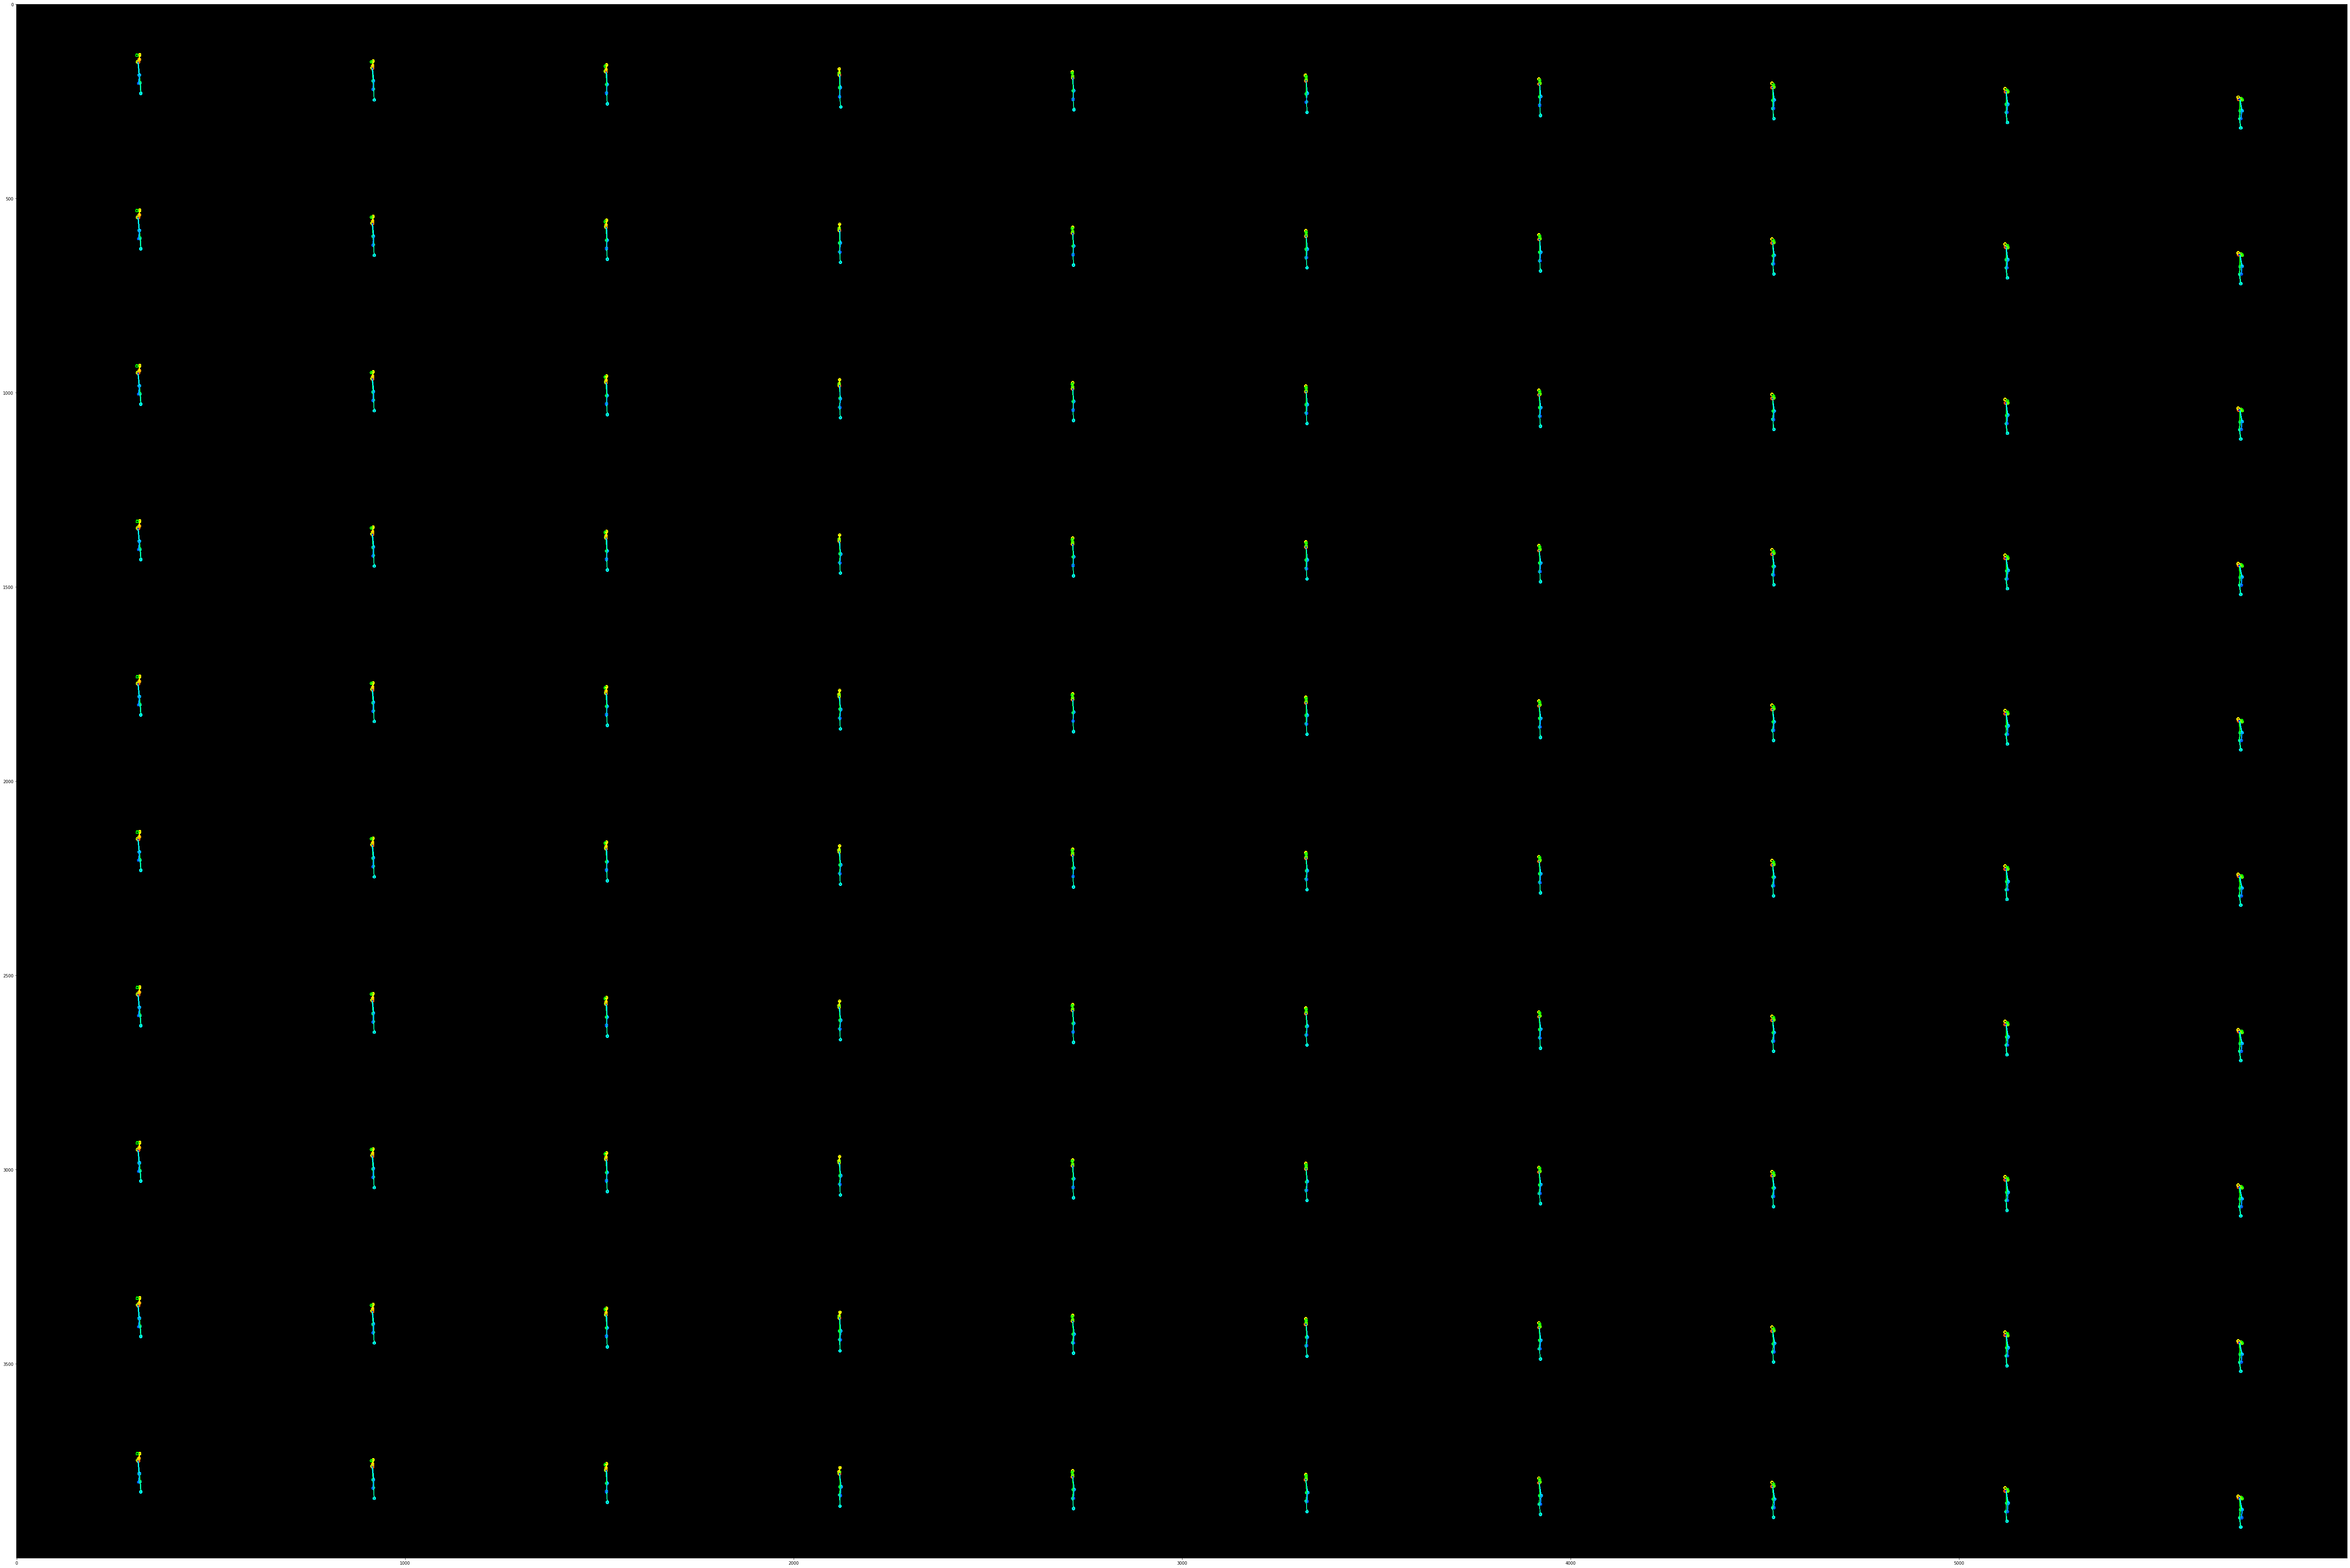

In [22]:
# display a 2D manifold of the poses
n = 10  # figure with 15x15 poses
x_size = 400
y_size = 600
img = np.zeros((x_size * n, y_size * n, 3), dtype=np.uint8)
blackimg = np.zeros((x_size, y_size, 3), dtype=np.uint8)
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        nimg = draw_squeleton(blackimg, x_decoded[0], imgcopy=True)
        
        #digit = x_decoded[0].reshape(digit_size, digit_size)
        img[i * x_size: (i + 1) * x_size,
               j * y_size: (j + 1) * y_size,:] = nimg

plt.figure(figsize=(100, 100))
plt.imshow(img)
plt.show()

## VAE LSTM

In [43]:
# defining the key parameters
batch_size = 100
input_dim = 26
latent_dim = 2
intermediate_dim = 13
epochs = 10
epsilon_std = 1.0
timesteps = 150

In [44]:
samples.shape

(4746, 150, 26)

In [54]:
# input to our encoder
x = Input(shape=(timesteps, input_dim))
# intermediate layer
e1 = LSTM(128, return_sequences=True)(x)
e2 = LSTM(64)(e1)
e3 = Dense(26)(e2)
# defining the mean of the latent space
z_mean = Dense(latent_dim)(e3)
# defining the log variance of the latent space
z_log_var = Dense(latent_dim, name="log-variance")(e3)
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
# defining the encoder as a keras model
encoder = Model(x, [z_mean, z_log_var, z], name="encoder")
# print out summary of what we just did
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 150, 26)      0                                            
__________________________________________________________________________________________________
lstm_19 (LSTM)                  (None, 150, 128)     79360       input_9[0][0]                    
__________________________________________________________________________________________________
lstm_20 (LSTM)                  (None, 64)           49408       lstm_19[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 26)           1690        lstm_20[0][0]                    
__________________________________________________________________________________________________
dense_14 (

In [55]:
# Input to the decoder
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
d1 = Dense(26, activation='relu', name="decoder_h")(input_decoder)
d2 = RepeatVector(timesteps)(d1)
d3 = LSTM(input_dim, return_sequences=True)(d2)

# getting the mean from the original dimension
x_decoded = Dense(original_dim, activation='sigmoid', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder = Model(input_decoder, d3, name="decoder")
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
decoder_h (Dense)            (None, 26)                78        
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 150, 26)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 150, 26)           5512      
Total params: 5,590
Trainable params: 5,590
Non-trainable params: 0
_________________________________________________________________


In [56]:
# grab the output. Recall, that we need to grab the 3rd element our sampling z
output_combined = decoder(encoder(x)[2])
# link the input and the overall output
vae = Model(x, output_combined)

vae.compile(optimizer='rmsprop', loss=vae_loss)
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 150, 26)           0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 130566    
_________________________________________________________________
decoder (Model)              (None, 150, 26)           5590      
Total params: 136,156
Trainable params: 136,156
Non-trainable params: 0
_________________________________________________________________


In [57]:
# training
vae.fit(samples, samples,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2)

Epoch 1/10


InvalidArgumentError: Incompatible shapes: [100,150] vs. [100]
	 [[{{node loss_5/decoder_loss/add_1}} = Add[T=DT_FLOAT, _class=["loc:@training_5/RMSprop/gradients/loss_5/decoder_loss/add_1_grad/Reshape"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](loss_5/decoder_loss/mul, loss_5/decoder_loss/mul_1)]]
	 [[{{node loss_5/mul/_831}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7401_loss_5/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [4]:
from vae_lstm import create_lstm_vae

In [63]:
vae, encoder, generator  = create_lstm_vae(input_dim =26, 
    timesteps=150, 
    batch_size=1, 
    intermediate_dim=150, 
    latent_dim=150,
    epsilon_std=1.)

In [64]:
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 150, 26)      0                                            
__________________________________________________________________________________________________
lstm_28 (LSTM)                  (None, 150)          106200      input_19[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 150)          22650       lstm_28[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 150)          22650       lstm_28[0][0]                    
__________________________________________________________________________________________________
lambda_10 

In [65]:
# training
vae.fit(samples, samples, shuffle=True, epochs=5)

Epoch 1/5
4746/4746 [==============================] - ETA: 20:11 - loss: 0.33 - ETA: 11:15 - loss: 0.27 - ETA: 8:18 - loss: 0.2223 - ETA: 6:47 - loss: 0.186 - ETA: 5:53 - loss: 0.163 - ETA: 5:16 - loss: 0.146 - ETA: 4:49 - loss: 0.133 - ETA: 4:28 - loss: 0.124 - ETA: 4:12 - loss: 0.118 - ETA: 3:58 - loss: 0.112 - ETA: 3:47 - loss: 0.106 - ETA: 3:38 - loss: 0.102 - ETA: 3:30 - loss: 0.098 - ETA: 3:23 - loss: 0.095 - ETA: 3:17 - loss: 0.092 - ETA: 3:12 - loss: 0.090 - ETA: 3:07 - loss: 0.088 - ETA: 3:02 - loss: 0.086 - ETA: 2:58 - loss: 0.084 - ETA: 2:54 - loss: 0.082 - ETA: 2:50 - loss: 0.081 - ETA: 2:47 - loss: 0.079 - ETA: 2:43 - loss: 0.078 - ETA: 2:40 - loss: 0.077 - ETA: 2:37 - loss: 0.075 - ETA: 2:35 - loss: 0.074 - ETA: 2:32 - loss: 0.074 - ETA: 2:30 - loss: 0.073 - ETA: 2:28 - loss: 0.072 - ETA: 2:26 - loss: 0.071 - ETA: 2:23 - loss: 0.070 - ETA: 2:22 - loss: 0.070 - ETA: 2:20 - loss: 0.069 - ETA: 2:18 - loss: 0.069 - ETA: 2:16 - loss: 0.068 - ETA: 2:14 - loss: 0.068 - ETA: 2:1

4746/4746 [==============================] - ETA: 2:36 - loss: 0.033 - ETA: 2:36 - loss: 0.030 - ETA: 2:29 - loss: 0.029 - ETA: 2:28 - loss: 0.030 - ETA: 2:28 - loss: 0.030 - ETA: 2:27 - loss: 0.031 - ETA: 2:25 - loss: 0.031 - ETA: 2:24 - loss: 0.031 - ETA: 2:22 - loss: 0.031 - ETA: 2:20 - loss: 0.031 - ETA: 2:18 - loss: 0.031 - ETA: 2:17 - loss: 0.031 - ETA: 2:16 - loss: 0.030 - ETA: 2:16 - loss: 0.030 - ETA: 2:15 - loss: 0.030 - ETA: 2:14 - loss: 0.030 - ETA: 2:14 - loss: 0.030 - ETA: 2:12 - loss: 0.030 - ETA: 2:11 - loss: 0.030 - ETA: 2:10 - loss: 0.030 - ETA: 2:09 - loss: 0.029 - ETA: 2:08 - loss: 0.029 - ETA: 2:07 - loss: 0.029 - ETA: 2:05 - loss: 0.029 - ETA: 2:04 - loss: 0.029 - ETA: 2:03 - loss: 0.030 - ETA: 2:02 - loss: 0.030 - ETA: 2:01 - loss: 0.030 - ETA: 2:00 - loss: 0.030 - ETA: 1:59 - loss: 0.030 - ETA: 1:58 - loss: 0.030 - ETA: 1:57 - loss: 0.030 - ETA: 1:56 - loss: 0.030 - ETA: 1:55 - loss: 0.030 - ETA: 1:54 - loss: 0.029 - ETA: 1:53 - loss: 0.030 - ETA: 1:52 - loss: 0

In [66]:
pred_samples = vae.predict(samples, batch_size=100)

In [67]:
pred_samples.shape

(4746, 150, 26)

In [70]:
draw_sequence(samples[0,:,:])

In [71]:
draw_sequence(pred_samples[0,:,:])

In [79]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 150)               0         
_________________________________________________________________
repeat_vector_20 (RepeatVect (None, 150, 150)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 150, 150)          180600    
_________________________________________________________________
lstm_30 (LSTM)               (None, 150, 26)           18408     
Total params: 199,008
Trainable params: 199,008
Non-trainable params: 0
_________________________________________________________________


In [100]:
z = np.random.rand(1,150)
gen_sample = generator.predict(z)
draw_sequence(gen_sample[0])

In [96]:
gen_sample.shape

(1, 150, 26)